# USAU College Nationals Data Prep

In [59]:
import os
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import random

Here's how a 20 team tournament is organized

In [10]:
poolteams = {'Pool A':[1,8,12,13,17],'Pool B':[2,7,11,14,18],'Pool C':[3,6,10,15,19],'Pool D':[4,5,9,16,20]}
poolassignments = pd.DataFrame(poolteams)
poolassignments

,Pool A,Pool B,Pool C,Pool D
0,1,2,3,4
1,8,7,6,5
2,12,11,10,9
3,13,14,15,16
4,17,18,19,20


load in scraped data

In [3]:
df = pd.read_csv('./data/ultimate/CollegeSeries/open_nationals_allgames.csv')
df['pnt_diff'] = df['home_score'] - df['away_score']
df['home_W'] = df['home_score'] > df['away_score']
df.head()

,event,type,home_team,away_team,home_score,away_score,home_seed,away_seed,pnt_diff,home_W
0,USA-Ultimate-D-I-College-Championships/schedul...,pool,Colorado (1),Harvard (8),15,11,1,8,4,True
1,USA-Ultimate-D-I-College-Championships/schedul...,pool,Wisconsin (12),California-San Diego (13),15,7,12,13,8,True
2,USA-Ultimate-D-I-College-Championships/schedul...,pool,Harvard (8),California-San Diego (13),15,14,8,13,1,True
3,USA-Ultimate-D-I-College-Championships/schedul...,pool,Wisconsin (12),Eastern Michigan (17),15,11,12,17,4,True
4,USA-Ultimate-D-I-College-Championships/schedul...,pool,Colorado (1),Eastern Michigan (17),15,9,1,17,6,True


Here's the probabilities for pool play

In [7]:
pool = df[df['type']=='pool']
pool_info = pool[['home_seed','away_seed','pnt_diff','home_W']].groupby(['home_seed','away_seed']).agg(['sum'])
years = pool['event'].nunique()
pool_odds = pool_info['home_W']['sum']/years
pool_odds.head()

home_seed  away_seed
1          8            0.833333
           12           1.000000
           13           0.666667
           17           1.000000
2          7            0.833333
Name: sum, dtype: float64

In [47]:
# 5 teams in each pool, n(n-1)/2 games in each pool
nPools = 4
nTeams = 5
nGames = int(nTeams*(nTeams-1)/2)
nSimul = 10000
pA = [[0 for j in range(nGames)] for i in range(nSimul)]
pB = [[0 for j in range(nGames)] for i in range(nSimul)]
pC = [[0 for j in range(nGames)] for i in range(nSimul)]
pD = [[0 for j in range(nGames)] for i in range(nSimul)]
pool_standings = [[{} for j in range(nPools)] for i in range(nSimul)]

In [77]:
# TODO: need to generalize this loop
for l in range(nSimul):
    # Pool A
    pA[l][0] = 1 if (random.uniform(0,1) < pool_odds[1][8]) else 8
    pA[l][1] = 12 if (random.uniform(0,1) < pool_odds[12][13]) else 13
    pA[l][2] = 8 if (random.uniform(0,1) < pool_odds[8][13]) else 13
    pA[l][3] = 12 if (random.uniform(0,1) < pool_odds[12][17]) else 17
    pA[l][4] = 1 if (random.uniform(0,1) < pool_odds[1][17]) else 17
    pA[l][5] = 1 if (random.uniform(0,1) < pool_odds[1][12]) else 12
    pA[l][6] = 8 if (random.uniform(0,1) < pool_odds[8][17]) else 17
    pA[l][7] = 1 if (random.uniform(0,1) < pool_odds[1][13]) else 13
    pA[l][8] = 8 if (random.uniform(0,1) < pool_odds[8][12]) else 12
    pA[l][9] = 13 if (random.uniform(0,1) < pool_odds[13][17]) else 17
    unique_el, counts_el = np.unique(pA[l][:],return_counts=True)
    pool_standings[l][0] = dict(zip(unique_el,counts_el))
    
    # Pool B
    pB[l][0] = 2 if (random.uniform(0,1) < pool_odds[2][18]) else 18
    pB[l][1] = 7 if (random.uniform(0,1) < pool_odds[7][14]) else 14
    pB[l][2] = 2 if (random.uniform(0,1) < pool_odds[2][7]) else 7
    pB[l][3] = 11 if (random.uniform(0,1) < pool_odds[11][14]) else 14
    pB[l][4] = 11 if (random.uniform(0,1) < pool_odds[11][18]) else 18
    pB[l][5] = 2 if (random.uniform(0,1) < pool_odds[2][11]) else 11
    pB[l][6] = 7 if (random.uniform(0,1) < pool_odds[7][18]) else 18
    pB[l][7] = 14 if (random.uniform(0,1) < pool_odds[14][18]) else 18
    pB[l][8] = 7 if (random.uniform(0,1) < pool_odds[7][11]) else 11
    pB[l][9] = 2 if (random.uniform(0,1) < pool_odds[2][14]) else 14
    unique_el, counts_el = np.unique(pB[l][:],return_counts=True)
    pool_standings[l][1] = dict(zip(unique_el,counts_el))
    
    # Pool C
    pC[l][0] = 6 if (random.uniform(0,1) < pool_odds[6][15]) else 15
    pC[l][1] = 10 if (random.uniform(0,1) < pool_odds[10][19]) else 19
    pC[l][2] = 3 if (random.uniform(0,1) < pool_odds[3][6]) else 6
    pC[l][3] = 10 if (random.uniform(0,1) < pool_odds[10][15]) else 15
    pC[l][4] = 3 if (random.uniform(0,1) < pool_odds[3][19]) else 19
    pC[l][5] = 15 if (random.uniform(0,1) < pool_odds[15][19]) else 19
    pC[l][6] = 3 if (random.uniform(0,1) < pool_odds[3][10]) else 10
    pC[l][7] = 6 if (random.uniform(0,1) < pool_odds[6][19]) else 19
    pC[l][8] = 3 if (random.uniform(0,1) < pool_odds[3][15]) else 15
    pC[l][9] = 6 if (random.uniform(0,1) < pool_odds[6][10]) else 10
    unique_el, counts_el = np.unique(pC[l][:],return_counts=True)
    pool_standings[l][2] = dict(zip(unique_el,counts_el))
    
    # Pool D
    pD[l][0] = 5 if (random.uniform(0,1) < pool_odds[5][16]) else 16
    pD[l][1] = 9 if (random.uniform(0,1) < pool_odds[9][20]) else 20
    pD[l][2] = 4 if (random.uniform(0,1) < pool_odds[4][20]) else 20
    pD[l][3] = 9 if (random.uniform(0,1) < pool_odds[9][16]) else 16
    pD[l][4] = 4 if (random.uniform(0,1) < pool_odds[4][5]) else 5
    pD[l][5] = 4 if (random.uniform(0,1) < pool_odds[4][9]) else 9
    pD[l][6] = 16 if (random.uniform(0,1) < pool_odds[16][20]) else 20
    pD[l][7] = 5 if (random.uniform(0,1) < pool_odds[5][20]) else 20
    pD[l][8] = 4 if (random.uniform(0,1) < pool_odds[4][16]) else 16
    pD[l][9] = 5 if (random.uniform(0,1) < pool_odds[5][9]) else 9
    unique_el, counts_el = np.unique(pD[l][:],return_counts=True)
    pool_standings[l][3] = dict(zip(unique_el,counts_el))

In [162]:
poolAresults = pd.DataFrame(pA).apply(lambda x: x.value_counts(),axis=1).fillna(0)
poolBresults = pd.DataFrame(pB).apply(lambda x: x.value_counts(),axis=1).fillna(0)
poolCresults = pd.DataFrame(pC).apply(lambda x: x.value_counts(),axis=1).fillna(0)
poolDresults = pd.DataFrame(pD).apply(lambda x: x.value_counts(),axis=1).fillna(0)
poolAresults.head()

,1,8,12,13,17
0,4.0,3.0,1.0,2.0,0.0
1,2.0,4.0,2.0,2.0,0.0
2,4.0,3.0,1.0,0.0,2.0
3,4.0,1.0,2.0,2.0,1.0
4,3.0,4.0,1.0,1.0,1.0


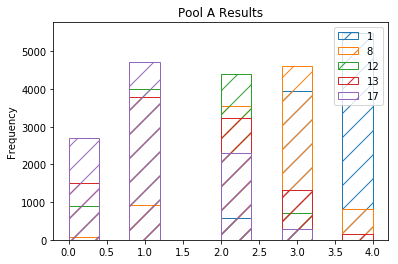

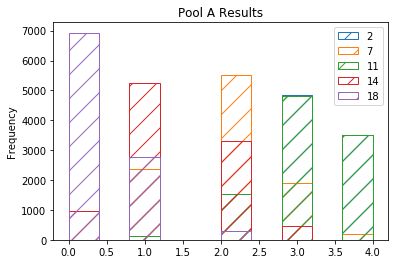

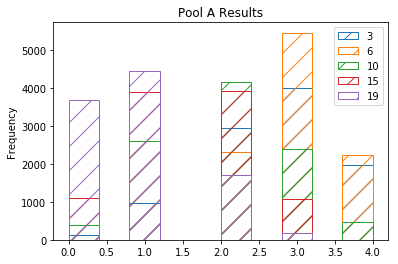

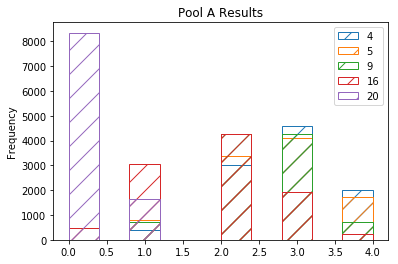

In [172]:
poolAresults.plot.hist(title="Pool A Results",histtype='step',hatch='/')
poolBresults.plot.hist(title="Pool A Results",histtype='step',hatch='/')
poolCresults.plot.hist(title="Pool A Results",histtype='step',hatch='/')
poolDresults.plot.hist(title="Pool A Results",histtype='step',hatch='/')

In [163]:
poolAtop3 = pd.DataFrame([poolAresults.T[j].nlargest(n=3).reset_index()['index'] for j in range(nSimul)]).reset_index(drop=True)
poolBtop3 = pd.DataFrame([poolBresults.T[j].nlargest(n=3).reset_index()['index'] for j in range(nSimul)]).reset_index(drop=True)
poolCtop3 = pd.DataFrame([poolCresults.T[j].nlargest(n=3).reset_index()['index'] for j in range(nSimul)]).reset_index(drop=True)
poolDtop3 = pd.DataFrame([poolDresults.T[j].nlargest(n=3).reset_index()['index'] for j in range(nSimul)]).reset_index(drop=True)
poolAtop3.head()

,0,1,2
0,1,8,13
1,8,1,12
2,1,8,17
3,1,12,13
4,8,1,12


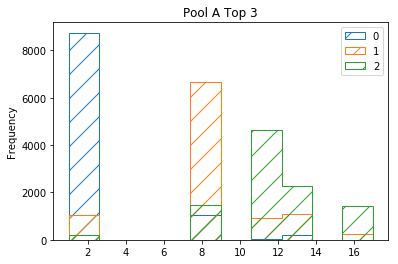

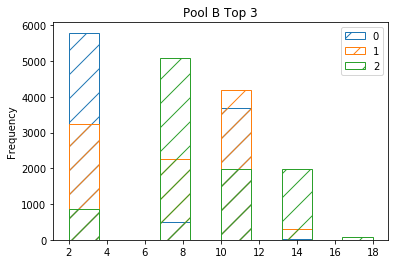

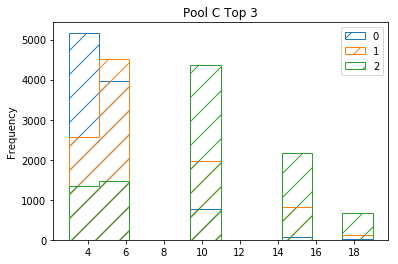

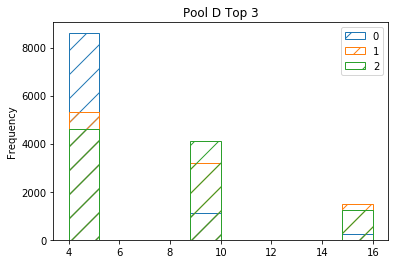

In [171]:
poolAtop3.plot.hist(title="Pool A Top 3",histtype='step',hatch='/')
poolBtop3.plot.hist(title="Pool B Top 3",histtype='step',hatch='/')
poolCtop3.plot.hist(title="Pool C Top 3",histtype='step',hatch='/')
poolDtop3.plot.hist(title="Pool D Top 3",histtype='step',hatch='/')

In [ ]:
poolAtop3

What we're missing in this simulation is the idea of a tie-breaker. Given the case where there is a two-, three-, or five-way tie in win total, the tie(s) is(are) broken via point-differential.

Here's the probabilities for bracket play 

In [6]:
brak = df[df['type']=='bracket']
brak_info = brak[['home_seed','away_seed','pnt_diff','home_W']].groupby(['home_seed','away_seed']).agg(['sum'])
years = brak['event'].nunique()
brak_info['home_W']['sum']/years

home_seed  away_seed
1          2            0.000000
           4            0.500000
           6            0.166667
           7            0.000000
           9            0.000000
2          1            0.000000
           10           0.000000
           15           0.166667
3          2            0.000000
           4            0.000000
           7            0.166667
           11           0.000000
           14           0.333333
4          3            0.000000
           11           0.166667
           17           0.166667
5          2            0.166667
           3            0.166667
           4            0.000000
           6            0.166667
           8            0.166667
           12           0.333333
6          1            0.000000
           2            0.166667
           4            0.166667
           5            0.166667
           7            0.166667
           9            0.166667
           11           0.166667
           14         

From these seeding matchup probabilities for pool play, we can calculate further interesting likelihoods